In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

sys.path.insert(0, "../src/")#
sys.path.insert(0, "../../project_1/src")
from NeuralNetwork import *
from CostFunctions import *
from ActivationFunctions import *
from SGD import *
from sklearn.model_selection import train_test_split
from FrankeFunction import *
from linear_regression import *

In [18]:
np.random.seed(2020)

N = 500
xy = np.random.uniform(0, 1, (N, 2))
z = FrankeFunction(xy[:, 0], xy[:, 1]) #+  np.random.normal(0, 1, N) * 0.2
z = z.reshape(-1,1)
xy_train, xy_test, z_train, z_test = train_test_split(xy, z, test_size=0.2)


curr_epochs = 0
per_loop = 10
tot_epochs = 1000

epochs = []
MSE = []

FFNN = FeedForwardNeuralNetwork(
    X=xy_train,
    Y=z_train,
    cost=CostFunctions.SquareError,
    activation=ActivationFunctions.Sigmoid,
    activation_out=ActivationFunctions.ID,
    network_shape=[30, 30, 30, 30, 30],
)

for i in range(int(tot_epochs / per_loop)):
    FFNN.train(N_minibatches=200, learning_rate=0.001, n_epochs=per_loop)
    z_test_prediction = FFNN.predict(xy_test)
    
    curr_epochs += per_loop
    epochs.append(curr_epochs)
    MSE.append(sum((z_test - z_test_prediction)**2) / (len(z_test)))


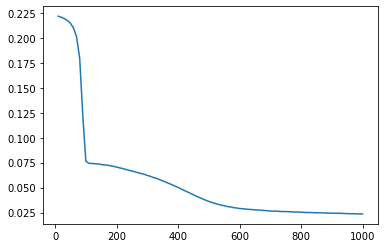

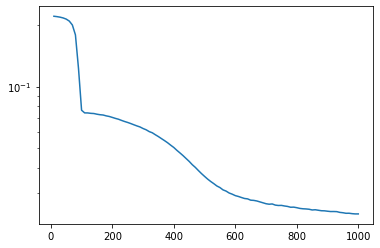

In [19]:
plt.plot(epochs, MSE)
plt.show()
plt.semilogy(epochs, MSE)
plt.show()

In [20]:
resolution = 100
x = np.linspace(0, 1, resolution)
y = np.linspace(0, 1, resolution)
X, Y = np.meshgrid(x, y)

X_flat, Y_flat = X.flatten(), Y.flatten()
XY_flat = np.array([X_flat, Y_flat]).T
Z_pred = FFNN.predict(XY_flat)
Z_pred = Z_pred.T.reshape(X.shape)
Z_Franke = FrankeFunction(X, Y)

(0.0, 1.2)

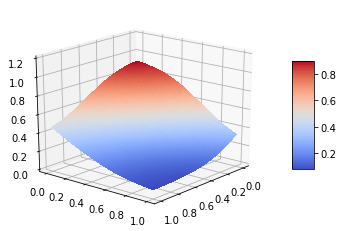

In [21]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z_pred, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.view_init(elev=20., azim=40)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_zlim([0, 1.2])

(0.0, 1.2)

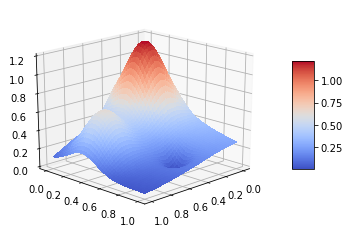

In [6]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z_Franke, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.view_init(elev=20., azim=45)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_zlim([0, 1.2])

In [7]:
FFNN.weights[1].shape

(30, 30)

(array([1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 2., 0., 1.,
        0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 2., 3., 0., 1.,
        2., 1., 1., 1., 0., 3., 1., 1., 1., 2., 0., 0., 1., 0., 1., 1., 3.,
        3., 2., 2., 2., 2., 0., 0., 0., 0., 2., 1., 1., 0., 0., 0., 0., 1.,
        1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
        1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([-1.84998543e+00, -1.80373573e+00, -1.75748603e+00, -1.71123633e+00,
        -1.66498663e+00, -1.61873693e+00, -1.57248722e+00, -1.52623752e+00,
        -1.47998782e+00, -1.43373812e+00, -1.38748842e+00, -1.34123872e+00,
        -1.29498902e+00, -1.24873931e+00, -1.20248961e+00, -1.15623991e+00,
        -1.10999021e+00, -1.06374051e+00, -1.01749081e+00, -9.71241107e-01,
        -9.24991406e-01, -8.78741704e-01, -8.32492003e-01, -7.86242302e-01,
        -7.39992601e-01, -6.93742899e-01, -6.47493198e-01, -6.01243497e-01,
        -5.5499379

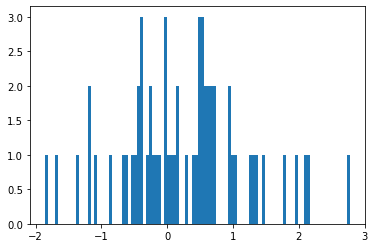

In [8]:
plt.hist(FFNN.weights[0].flatten(), bins = 100)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,
         0.,  0.,  1.,  0.,  0.,  2.,  2.,  1.,  3.,  3.,  1.,  1.,  1.,
         1.,  3.,  5.,  5., 11., 10.,  6.,  9., 11., 12.,  8., 13., 18.,
        19., 18., 10., 17., 19., 20., 22., 29., 24., 30., 24., 26., 16.,
        20., 24., 18., 33., 28., 22., 15., 20., 19., 16., 30., 13., 22.,
        13., 30., 14., 18., 12., 13.,  9.,  7., 10., 11.,  5.,  9.,  9.,
         3.,  6., 11.,  4.,  8.,  1.,  6.,  3.,  0.,  3.,  0.,  3.,  0.,
         0.,  0.,  0.,  0.,  2.,  0.,  4.,  1.,  1.]),
 array([-3.72220156, -3.65460768, -3.58701379, -3.5194199 , -3.45182602,
        -3.38423213, -3.31663824, -3.24904436, -3.18145047, -3.11385658,
        -3.0462627 , -2.97866881, -2.91107492, -2.84348104, -2.77588715,
        -2.70829326, -2.64069938, -2.57310549, -2.5055116 , -2.43791771,
        -2.37032383, -2.30272994, -2.23513605, -2.16754217, -2.09994828,
        -2.03235439, -1.96476051, -1.89716662, -1.82957273, -1.761978

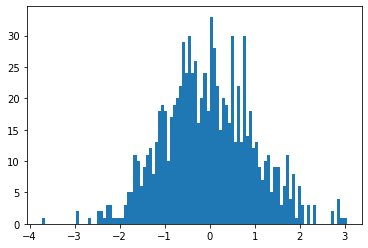

In [9]:
plt.hist(FFNN.weights[1].flatten(), bins = 100)